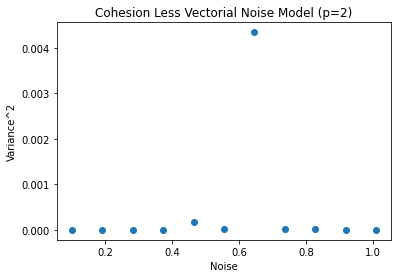

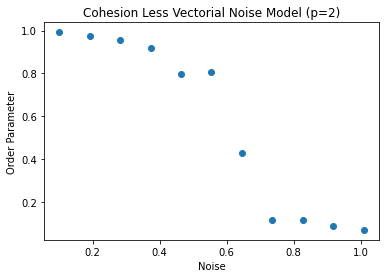

In [1]:
import numpy as np
import matplotlib.pyplot as plt
noise= np.linspace(0.1,1.1,11,endpoint=False) #creates an list of noise
order_avg=[] #empty list towhich values of order paramter are stored
L = 10 #size of periodic domain
n = 200 #initialised particles
r=1 #interaction radius
vel=0.03 #velocity of particles
std=[] 
binder=[]
theta= ((2 * np.random.rand(n) - 1) * np.pi) #random angles for particles
df =  np.random.rand(n,2) * L #random positions for particles
df_initial= df.copy() #a copy of initial positions
theta_initial= theta.copy() #a copy of initial theta
for e in noise: 
  order=[]
  for m in range(5): #iterates through 5 times for each noise value to give std dev
    df = df_initial
    theta = theta_initial
    t=0
    while t<200:
      df1 = df.copy()
      theta_1= theta.copy() #takes a copy of the data inside the while loop as we operate on this to change the main data set (df)
      for y in range(len(df)): #chooses a particle
          x1 = df1[y,0:2] #position of the chosen particle
          df2= np.delete(df1, (y), axis=0) #deletes position of the chosen particle
          theta1= np.delete(theta, (y), axis=0) #deletes angles of the chosen particle
          df2= -df2 + x1
          df2 = np.where(df2>L/2, df2-L, df2)   #mirror image criterion applied
          df2 = np.where(df2<-L/2, df2+L, df2)
          dist = df2[:,0]**2 + df2[:,1]**2     #calculates distances of other particles wrt to chosen particles
          dist1 = dist < 1 #choses particles in interaction radius
          theta1= theta1[dist1] #uses boolean indexing to values of the near particles
          z=(2 * np.random.rand(1) - 1) * np.pi #random error
          avg_theta= np.arctan2(np.sum(np.sin(theta1))+e*len(theta1)*np.sin(z),np.sum(np.cos(theta1))+e*len(theta1)*np.cos(z)) #calculates average direction and adds the erros
          theta[y] = avg_theta #updates theta value
      df[:,0] = df[:,0] + vel * np.cos(theta) #updates positions
      df[:,1] = df[:,1] + vel * np.sin(theta)
        # Applying periodic boundaries
      df[:, 0] = np.mod(df[:, 0],L)
      df[:, 1] = np.mod(df[:, 1],L)
      t=t+1
    order.append(((np.sum(np.cos(theta)))**2 + (np.sum(np.sin(theta)))**2)**0.5/n)
  order4=[i**4 for i in order]
  order2=[i**2 for i in order]
  std.append(np.std(order))
  binder.append(np.mean(order4)/3*(np.mean(order2)**2))
  order_avg.append(np.sum(order)/len(order))
plt.figure()
a=plt.scatter(noise,[i**4 for i in std])
plt.xlabel("Noise")
plt.title('Cohesion Less Vectorial Noise Model (p=2)');
plt.ylabel("Variance^2")
plt.show(a)

plt.figure()
b= plt.scatter(noise,order_avg)
plt.title('Cohesion Less Vectorial Noise Model (p=2)');
plt.xlabel("Noise")
plt.ylabel("Order Parameter")
plt.show(b)
